# NETFLIX EDA

# Importing Libraries

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# importing data  and checking for missing value

In [267]:
netflix_df=pd.read_csv('./Documents/netflix_titles.csv')
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
### we found out that the director and cast columns have high missing values. So, we will drop these two columns.
### And for country,date_added,rating , we will replace the missing values by mode.

In [268]:
netflix_df.drop(['director','cast'],axis=1,inplace=True) ###dropping these two columns

In [270]:
##replacing the missing values in other columns with mode
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df['date_added']=netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0])
netflix_df['rating']=netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [271]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [272]:
netflix_df.duplicated().sum() ####to check duplicate rows , we found there is none

0

In [273]:
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [274]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [275]:
### creating a new column,target_age by replacing the column 'rating' with dictionary 'rating_ages'
netflix_df['Target_age']=netflix_df['rating'].replace(ratings_ages) 


In [276]:
netflix_df['y_add'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df['m_add'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])

##In country column, there are more than one countries for some rows . so we will create new column having one country only.
netflix_df['country_main']=netflix_df['country'].apply(lambda x:x.split(",")[0])


In [277]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Target_age,y_add,m_add,country_main
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020,August,Brazil
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,December,Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,December,Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,November,United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,January,United States


In [278]:
##creating data frame containing TV shows
netflix_TV_df=netflix_df[netflix_df['type']=='TV Show']

##creating data frame containing movies
netflix_movies_df=netflix_df[netflix_df['type']=='Movie']

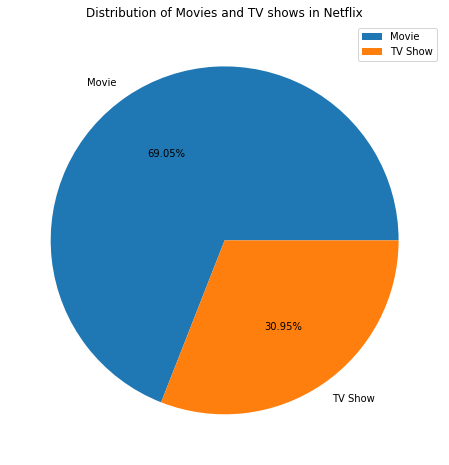

In [279]:
plt.figure(figsize=(12,8))
plt.pie(x,labels=[x.index[0],x.index[1]],autopct='%.2f%%');
plt.legend();
plt.title("Distribution of Movies and TV shows in Netflix");

# We can conclude here that 30.95% shows in Netflix are TV Shows and the other 69.05% are Movies.

In [280]:
country_df = netflix_df['country_main'].value_counts().reset_index()
country_df=country_df[country_df['country_main']/country_df['country_main'].sum()>0.01]


In [281]:
fig=px.pie(country_df,values='country_main',names='index',title='Country wise distribution of show')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [282]:
def generate_df(df):
    new_df=df.groupby('y_add').agg({'show_id':'count'}).reset_index()
    new_df=new_df[new_df['show_id'] != 0]
    new_df.columns=['y_add', 'counts']
    new_df=new_df.sort_values('y_add')
    return new_df

In [283]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])
movie_new_df=generate_df(netflix_movies_df)
tv_new_df=generate_df(netflix_TV_df)
fig.add_trace(go.Pie(labels=movie_new_df['y_add'], values=movie_new_df['counts']),
    row=1, col=1)
fig.add_trace(
    go.Pie(labels=tv_new_df['y_add'], values=tv_new_df['counts']),
    row=1, col=2
)
fig.update_traces(textposition='inside',hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Content distribution by Year of Adding",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.18, y=0.5, font_size=17, showarrow=False, font_color='black'),
                 dict(text='TV Shows', x=0.83, y=0.5, font_size=17, showarrow=False, font_color='black')])

# The above plot shows, dstribution of movies and TV shows separately upon the year of adding. We can see there is increase in the number of shows as the year increase. 

In [285]:
def generate_year_df(df,year):
    new_df = df.groupby(['Target_age', 'y_add']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['Target_age', 'y_add', 'counts']
    new_df = new_df.sort_values('y_add')
    new_df= new_df[new_df['y_add']==year]
    return new_df

In [286]:
grp_2015=generate_year_df(netflix_df,2015)
grp_2020=generate_year_df(netflix_df,2020)

In [287]:
fig=make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=['2015','2020'])
fig.add_trace(go.Pie(labels=grp_2015['Target_age'], values=grp_2015['counts'],name="Target audience 2015"), 1, 1)
fig.add_trace(go.Pie(labels=grp_2020['Target_age'], values=grp_2020['counts'],name="Target audience 2020"), 1, 2)
fig.update_traces(textposition='inside', textinfo="label+percent")
fig.update_layout(title_text="Target audience in 2015 VS 2020")

In [288]:
def generate_age_df(df):
    new_df = df.groupby('Target_age').agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['Target_age', 'counts']
    new_df = new_df.sort_values('Target_age')
    return new_df


In [289]:
movie_age_df=generate_age_df(netflix_movies_df)

fig=px.pie(movie_age_df,values='counts',labels='Target_age',title="Age category wise distribution",names='Target_age')
fig.update_traces(textposition='inside',textinfo='label+ percent',hole=.5)

fig.update_layout(annotations=[dict(text='Movies',showarrow=False,font_size=40)])

In [211]:
TV_age_df=generate_age_df(netflix_TV_df)

fig=px.pie(TV_age_df,values='counts',labels='Target_age',title="Age category wise distribution",names='Target_age')
fig.update_traces(textposition='inside',textinfo='label+ percent',hole=.5)

fig.update_layout(annotations=[dict(text='TV',showarrow=False,font_size=40)])

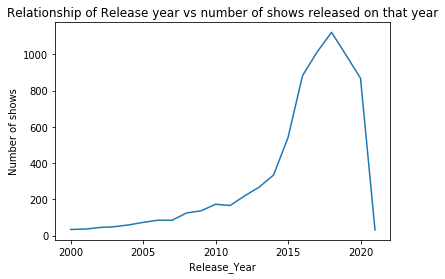

In [290]:
z=netflix_df.groupby('release_year').agg({'show_id':'count'}).reset_index()
z=z[z['release_year']>1999]
plt.plot(z['release_year'],z['show_id'])
plt.xlabel('Release_Year')
plt.ylabel('Number of shows')
plt.title("Relationship of Release year vs number of shows released on that year");

# We can see here that the number of shows released starts increasing as the year increases.

In [291]:
def generate_duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')
    return new_df

In [292]:
movie_duration_df=generate_duration_df(netflix_movies_df)
fig = px.bar(movie_duration_df,x='duration', y ='counts')
fig.update_xaxes(type='category',categoryorder='total ascending')
fig.show()

# In tha above plot we can see that frequency of movies with respect to duration . And we can see maximum movies are of 90 minutes duration.

In [293]:
TV_duration_df=generate_duration_df(netflix_TV_df)
fig = px.bar(TV_duration_df,x='duration', y ='counts')
fig.update_xaxes(type='category',categoryorder='total ascending')
fig.show()

# The above plot is based upon the seasons of TV series. As we can see, only 1 season records the highest number of Tv series.